In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Naive enumeration

In [20]:
E = [0] + 3 * [1] + 6 * [2] + 10 * [3] + 15 * [4]
N0vec = []
Tvec = []
Ztot=[]

In [21]:
for T in numpy.arange(0.1, 1.5, 0.1):
    Tvec.append(T)
    Z = 0.0
    N0mean = 0.0
    beta = 1.0 / T
    for s1 in range(35):
        for s2 in range(s1, 35):
            for s3 in range(s2, 35):
                for s4 in range(s3, 35):
                    for s5 in range(s4, 35):
                        Etot=E[s1] + E[s2] + E[s3] + E[s4] + E[s5]
                        svec = [s1, s2, s3, s4, s5]
                        N0mean += svec.count(0) * math.exp(-beta * Etot)
                        Z += math.exp( -beta * Etot)
    Ztot.append(Z)
    N0vec.append(N0mean / Z / 5.0)

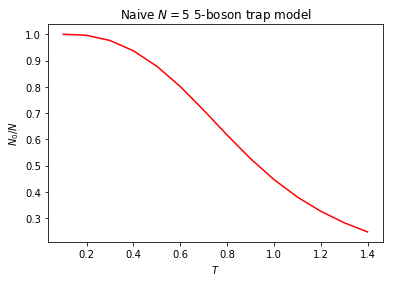

In [22]:
pylab.plot(Tvec, N0vec, 'r-')
pylab.title('Naive $N=5$ 5-boson trap model')
pylab.xlabel('$T$')
pylab.ylabel('$N_0 / N $')
pylab.show()

In [35]:
N0vec = []
dos = [1, 3, 6, 10, 15]
eps = 0.001
dellambda = 0.01
complexi = complex(0.0, 1.0)
Ztot2=[]

In [36]:
for T in Tvec:
    Zint=complex(0.0,0.0)
    beta = 1.0 / T
    oldl = complex(-math.pi, eps)
    for RL in numpy.arange(-math.pi, math.pi, 0.00001):
        newl = RL + eps * complexi
        integrand = exp(-complexi * 5 * newl)
        for E in range(5):
            integrand /= (1.0 - exp( - beta * E + complexi * newl)) ** dos[E]
        Zint += integrand * (newl - oldl) / (2.0 * math.pi)
        oldl = newl
    Ztot2.append(Zint)

In [33]:
Ztot

[1.000136224526684,
 1.0207705099637532,
 1.1242278972612432,
 1.3548875017920095,
 1.7802348636085865,
 2.535546223596034,
 3.8732495947558716,
 6.236889859832073,
 10.359307259678479,
 17.373297218268803,
 28.915064997929925,
 47.199028344469035,
 75.04767620163041,
 115.86961428002716]

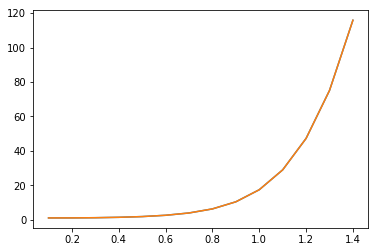

In [44]:
plot(Tvec,Ztot)
plot(Tvec,real(Ztot2))

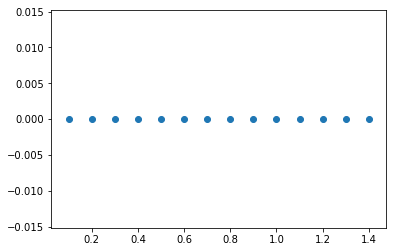

In [47]:
scatter(Tvec,abs(Ztot-real(Ztot2)))